In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import skfuzzy as fuzz
import matplotlib.pyplot as plt

/home/namanh/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# Đọc dữ liệu
orders = pd.read_csv('List of Orders.csv')
order_details = pd.read_csv('Order Details.csv')

In [6]:
orders.dropna(inplace=True)

In [5]:
order_details.dropna(inplace=True)

In [8]:
orders.columns

Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City'], dtype='object')

In [9]:
order_details.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category'], dtype='object')

In [11]:
# Merge 2 bảng theo Order ID
df = pd.merge(order_details, orders, on='Order ID')

In [12]:
df.head(5)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


In [13]:
# Chọn các đặc trưng số
features = ['Amount', 'Profit', 'Quantity']
data = df[features].copy()

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

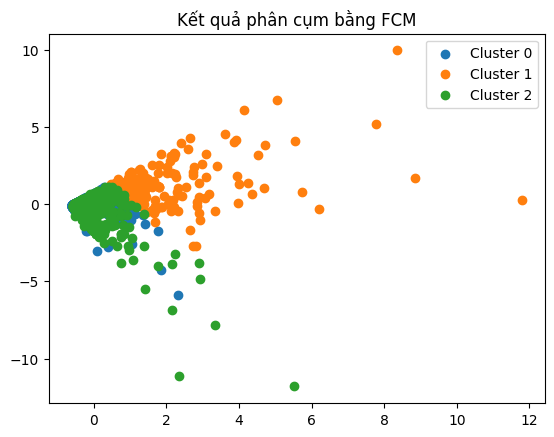

In [ ]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, c=3, m=2, error=0.005, maxiter=1000, init=None)

# Gán nhãn cho mỗi điểm dữ liệu
cluster_membership = np.argmax(u, axis=0)

# Vẽ kết quả phân cụm
plt.figure()
for j in range(3):
    plt.scatter(X_scaled[cluster_membership == j, 0],
                X_scaled[cluster_membership == j, 1], label=f'Cluster {j}')
plt.legend()
plt.title('Kết quả phân cụm bằng FCM')
plt.show()